In [ ]:
### Yiğit Şevki KAPLAN
### 22243810049
### 08.10.2025

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
# libraries imported

In [ ]:
sperformance = pd.read_csv("Student_Performance.csv")

In [ ]:
sperformance.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


In [ ]:
sperformance.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [ ]:
# son 5 taneyi yazdırıyor
# y değerimiz 'Performance Index'
# diğerleri x
# multi-linear regression var.

In [ ]:
sperformance.shape

(10000, 6)

In [ ]:
sperformance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
sperformance.drop(['Extracurricular Activities'], axis = 1, inplace = True)
# Extracurricular Activities'i dropladık
# inplace = True | sperformance = sperformance... yapmamak için

In [ ]:
sperformance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Sleep Hours                       10000 non-null  int64  
 3   Sample Question Papers Practiced  10000 non-null  int64  
 4   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 390.8 KB


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


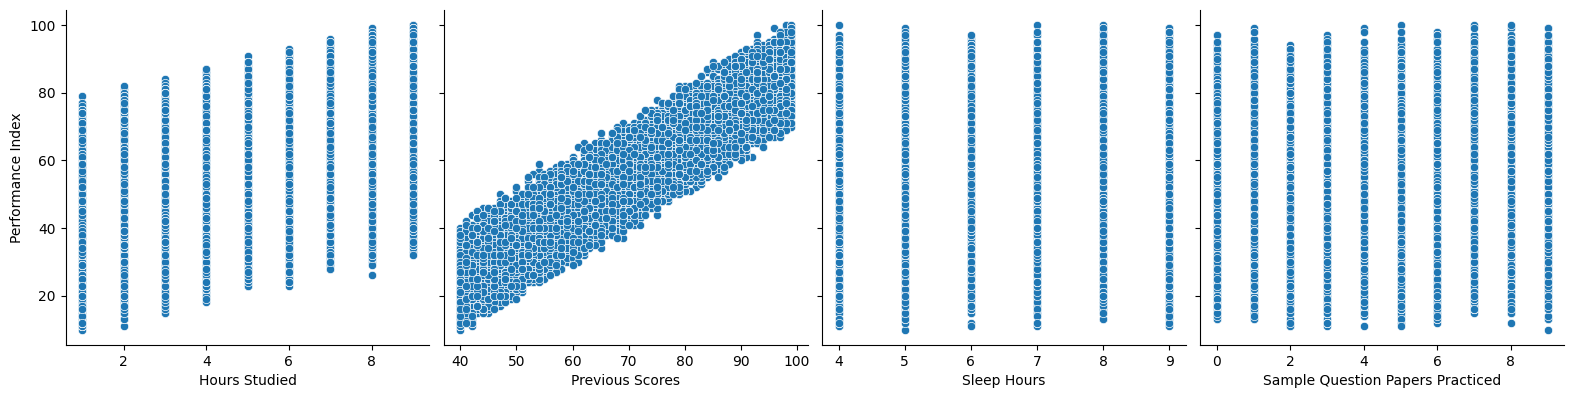

In [ ]:
sns.pairplot(sperformance, x_vars = ['Hours Studied', 'Previous Scores', 'Sleep Hours',
                                     'Sample Question Papers Practiced'],
                                      y_vars = ['Performance Index'], size = 4)

<Axes: >

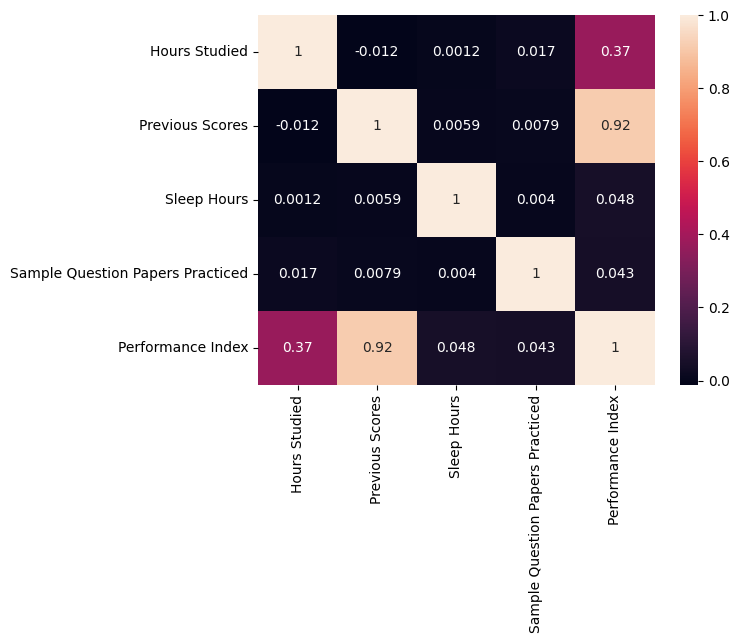

In [ ]:
sns.heatmap(sperformance.corr(), annot = True)

In [ ]:
# 'Hour Studied' ve 'Previous Scores' etkiliyor

In [ ]:
Y = sperformance['Performance Index']
X = sperformance.drop(['Performance Index'], axis = 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size = 0.8, random_state= 42)

In [ ]:
x_train_sm = sm.add_constant(x_train)

In [ ]:
lr = sm.OLS(y_train, x_train_sm).fit()

In [ ]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:      Performance Index   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 1.709e+05
Date:                Wed, 08 Oct 2025   Prob (F-statistic):               0.00
Time:                        08:38:45   Log-Likelihood:                -17151.
No. Observations:                8000   AIC:                         3.431e+04
Df Residuals:                    7995   BIC:                         3.435e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [ ]:
x_test_sm = sm.add_constant(x_test)
y_train_predict = lr.predict(x_test_sm)

In [ ]:
r2_score(y_test, y_train_predict)

0.9887144552384187